Andreas Kooi

Physics 115: Computational Physics, Spring 2020

University of California, Santa Cruz

Final Project

# Modeling Shallow Water Waves at Shorelines

### Introduction & Motivation

The motivation of this project is to model shallow water waves near shorelines. Understanding coastal physics is important to oceanic researchers, applied mathematicians, and physicists.
To delve into the investigation and wave modeling, fundamental elements of water wave physics and linear wave theory will be discussed and implemented, such as the dispersion relation and phase speed of waves. Then, by animating the water waves, we will see in action how the profile of a shoreline affects the characteristics of a shallow water wave. Brief discussion about the differences with deep water waves will also be touched upon. 

To investigate further, details of nonlinear aspects commonly found in shallow water waves will be discussed. The nonlinear KDV equation will then be modeled analytically and numerically. The KDV equation used will allow for a solitary shallow water wave to be modeled, and a nonlinear effect of wave shoaling can be noticed.

### Background

The topic of water wave theory was first attempted by Isaac Newton in 1687 with his second book in his famous three part Principia. In the eigteenth and nineteenth centuries, mathematicians such as Laplace, Lagrange, Poisson, and Cauchy advanced the theory of linear water waves. Following the 1800s, more advancements in nonlinear theories and the field of fluid mechanics were made$^{[1]}$.




### Gravitional Waves: The Dispersion relation for Shallow and Deep Water

Because the field of water wave theory is so large, the fundamental topic of linear water dispersion will be visited.
The relationships and derivations for each equation in this section can be found in the comphrensive document "Linear Wave Theory Part A" (Krogstad, Arntsen)$^{[2]}$. To save space, the derivations are not derived here.

In general, linear wave theory deals with the disturbance of a fluid, with gravity and surface tension being the restoring factors for equillibrium. The waves modeled here will be surface gravity waves, dealing with gravity, meaning that the effects of surface tension will not be considered. Waves dealing with surface tension are known as capillary waves.

The dispersion relation for water waves is related by the following equation, and is fundamental in linear wave theory:

$ \omega^2 = gk * tanh (kh) $ 

Where: 

$\omega$ is the angular frequency, g is the gravitational acceleration constant, k is the wavenumber $\frac{2 \pi}{\lambda}$, and h is the water depth.

The dispersion relation says that two frequencies, -w, and w are allowed for a given wavelength, given by the wavenumber k. They are positive and negative because they represent the wave being able to travel in both the positive and negative direction. 

If the water depth is shallow, tanh(hk) can be approximated as hk, and the dispersion relation becomes: 

$\omega^2 = gk^2h$ (Shallow Water)

In the case of deep water (h goes to infinity), tan(hk) can be approximated to be 1, and the dispersion relation becomes $\omega^2 = gk$.

This tells us that the frequency does not depend on the water depth once a certain water depth is reached. This threshold happens to be when $h > \lambda /2$. In nature, the shallow water relation is accepted as $h < \lambda /20$. All other depths are considered intermediate depths, and have their own relationships not discussed here.

### Shallow Water: Other aspects

The phase velocity $c_p$, also known as celerity, is defined as$^{[2]}$: 

$c_p = \frac{\lambda}{T} = \frac{\omega}{k}$

$c_p = \sqrt{gh}$ (For shallow water)

$\lambda = T \sqrt{g h} $

For shallow water, the phase velocity equals the group velocity. In deep waters, the group velocity approaches half of the phase velocity. Further explanation can be found in  (Krogstad, Arntsen)$^{[2]}$.


### Shallow Water: Two examples

With the fundamental equations above, a simple wave function of a shoreline can be modeled. The function will take on the form $Asin(kx + \omega t)$, which is a valid form for surface waves$^{[2]}$.

The wavenumber k will vary with water depth, so first, a depth model needs to be considered. Then, the wavenumbers are created and the wave function is plotted over the course of time and depth. It is then animated as well.

The two following models of shoreline depth are entirely theoretical and not based on any reality of how depth is associated with real coastlines. The depth models are to see a few of the fundamental elements of linear wave theory in action.

The first model is a downward parabola. The second model is a series of flat steps. Boundary conditions were solved for each discontinuity in the second model. Furthermore, only the wave direction in the negative direction is considered. Adding the positive direction results in a standing wave. For simplicity, the period and amplitudes are set to a value of 1.

When the cell below is run, an input will be asked for which shoreline model to display. 

What Shoreline would you like to see modeled?
--------------------------------------
'0': Parabolic shoreline
'1': Step Shoreline
0


<IPython.core.display.Javascript object>


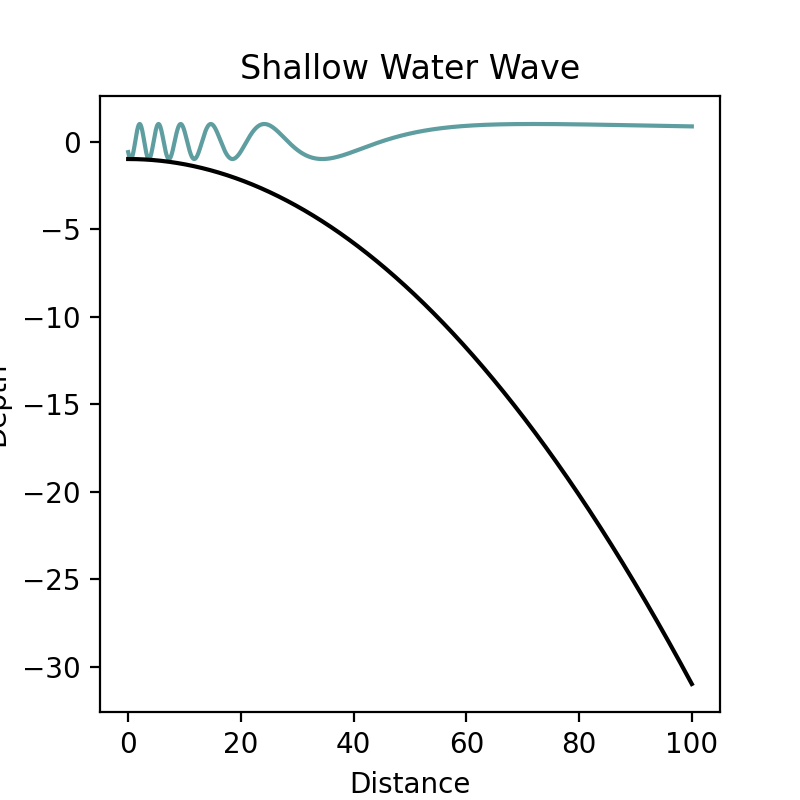

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
import matplotlib.animation as animation

#==========================================================
# Functions: Wave function, Shoreline models, and Animation
#==========================================================

def sin(k,x,t):
    w = (2*np.pi)/T
    #print(w*t)
    return np.sin(k*x + w*t)

def shoreline_1():
    x = np.arange(0.01,100.0,0.05)
    d = np.linspace(-1,-1,int(len(x)/4))
    model = -1 - 0.015*x**2
    d = np.linspace(d[0],d[0],int(len(x)/4))
    flat_len = len(d)
    d = np.append(d,(model)[0:len(x)-2*flat_len])
    d = np.append(d,np.linspace(d[-1],d[-1],flat_len))
    d = -1 -0.003*x**2
    return(np.array(x), np.array(d))

def shoreline_2():
    x = np.linspace(0.0,80.0,1000)
    num = -1.6
    sections = 4
    d = np.array([])
    d = np.append(d,np.linspace(num,num,int(len(x)/sections)))
    #Boundary Solution: -10.350788
    d = np.append(d,np.linspace(-10.350788,-10.350788,int(len(x)/sections)))
    #Boundary Solution: -17.407634
    d = np.append(d,np.linspace(-17.407634,-17.407634,int(len(x)/sections)))
    #Boundary Solution: -49.392742
    d = np.append(d,np.linspace(-49.392742,-49.392742,int(len(x)/sections)))
    return(np.array(x), np.array(d))

def animate(i,ii):
    # i: for animation steps
    # ii: which shoreline 
    plt.clf()
    plt.plot(x[ii], sin(k[ii],x[ii],i), color="cadetblue")
    plt.plot(x[ii],d[ii], color="black")
    plt.xlabel('Distance')
    plt.ylabel('Depth')
    plt.title('Shallow Water Wave')
    
#==========================================================
# Calculations
#==========================================================

#-----Constants and Parameters-----
g = -9.81
T = 1.0  
x = [[],[]]
d = [[],[]]
l = [[],[]]
k = [[],[]]
c = [[],[]]
x[0], d[0]= shoreline_1()
x[1], d[1] = shoreline_2()
l[0] = T*np.sqrt(g*d[0])
l[1] = T*np.sqrt(g*d[1])
k[0] = 2*np.pi/l[0]
k[1] = 2*np.pi/l[1]
c[0] = np.sqrt(g*d[0])
c[1] = np.sqrt(g*d[1])

#==========================================================
# Input and Plotting
#==========================================================

print("What Shoreline would you like to see modeled?")
print("--------------------------------------")
print("'0': Parabolic shoreline")
print("'1': Step Shoreline")
shoreline = int(input())

fig = plt.figure(figsize=(4,4))
plt.xlim(0, 100)
ani = matplotlib.animation.FuncAnimation(fig,animate,fargs=(shoreline,), frames=np.arange(0,1,0.1), repeat=True)
plt.show()

### Results

As depicted by both models, the wavelength ($\lambda = T \sqrt{g h} $) increases as the depth increases.
Also noticeable in both models (especially the second) is that the phase speed becomes higher as the depths increase as well ($c_p = \sqrt{g d}$).

In both models, the amplitude is constant at value 1. As we shall see, this is not the case when nonlinear effects are considered.

Note: Depths for the second model were chosen to satisfy continuity between jumps (where $sin(\frac{2\pi}{\sqrt{gd_1}} * x) = sin(\frac{2\pi}{\sqrt{gd_2}} * x)$, but there is still a noticeable discontinuity in the animation. Ideally, such a discontinuity would not exist in an artificial coastline.

### Nonlinear Effects

Besides the phase speed and wavenumber changing, other effects are present in shallow water waves. Things such as the current and drift of the ocean, refraction from hitting objects or changing mediums, wave reflections from the coast, and wave shoaling affect the characteristics of a shallow water wave.

Next we will add spice to our two depth models by implementing nonlinearity. We will do this using the KDV equation. The effect that will be noticed is that the amplitude of a solitary wave increases as it approaches the shore. This effect is known as wave shoaling, and is a predominant nonlinear effect noticed with shallow water.

### Korteweg-de Vries Equation 

Often times an ocean wave is intuitvely thought of as the outer envelope of a solitary wave. Such a solitary wave is known as a soliton. There are many mathematical shallow water models which handle the shape of an envelope. One of such is the Korteweg-de Vries Equation equation, KDV for short. It describes nonlinear shallow water waves, and is well known among nonlinear wave theories because because it holds an exact solution. The nonlinear KDV partial differential equation is $^{[3]}$:

$ u_t + u_{xxx} + 6 u u_x = 0 $

Where u is a potential function and each subscript represents a derivative. An equivalent notation would be $\partial_t u + \partial_x^3 u + 6 u \partial_x u = 0$.

The KDV equation has an analytical solution of

$ u(x,t) = \frac{c_p}{2} sech^2 (\frac{\sqrt{c_p}}{2} (x - c_p t - x_0) $

By nature, the KDV solution is just the positive outer part of the wave shape. The derivation can be found in the document referenced$^{[3]}$.

### Soliton Models using the KDV Analytical Solution

The KDV solution aforementioned will now be applied and animated to the two depth models from before. To do this, a kdv function is made. A user input is asked again.

What Shoreline would you like to see modeled by the KDV equation?
--------------------------------------
'0': Parabolic shoreline
'1': Step Shoreline
0


<IPython.core.display.Javascript object>


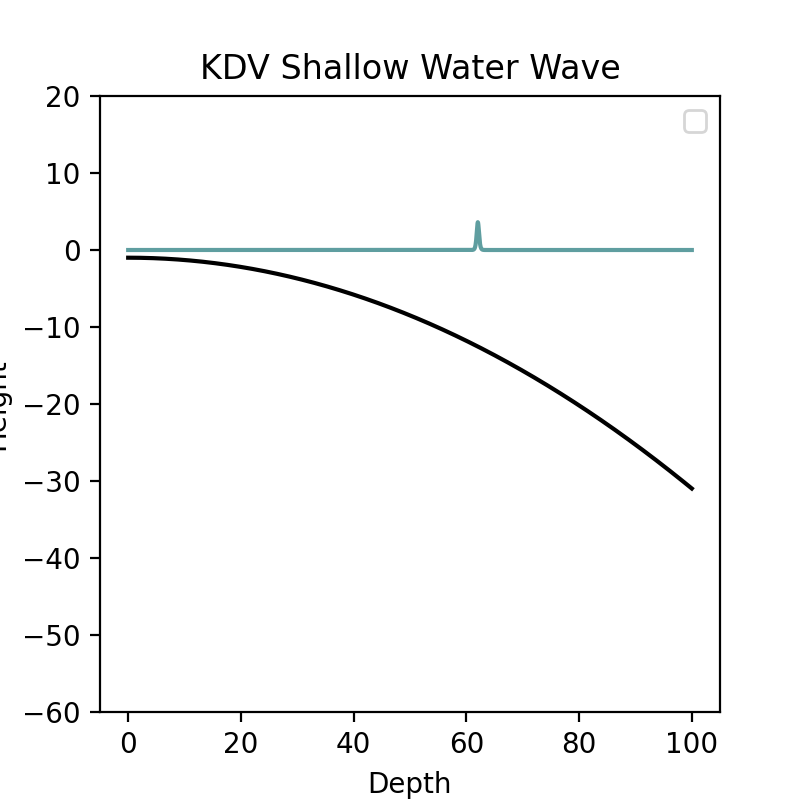

In [5]:
#==========================================================
# Functions: KDV and Animation
#==========================================================
        
def kdv(x,t,d):
    c = np.sqrt(g*d)
    u = []
    for i in range(len(x)):
        temp = .5*c[-i]*((1/(np.cosh(.5*c[-i]*(x[-i]-t))))**2)
        u.append(temp)
    return u

def animate_2(i,ii):
    # i: for animation steps
    # ii: which shoreline 
    plt.clf()
    plt.plot(x[ii], kdv(x[ii],i,d[ii]), color="cadetblue")
    plt.plot(x[ii],d[ii], color="black")
    plt.ylim(-60,20)
    plt.xlabel('Depth')
    plt.ylabel('Height')
    plt.title('KDV Shallow Water Wave')
    plt.legend()

#==========================================================
# Input and Plotting
#==========================================================

print("What Shoreline would you like to see modeled by the KDV equation?")
print("--------------------------------------")
print("'0': Parabolic shoreline")
print("'1': Step Shoreline")
shoreline = int(input())

fig1 = plt.figure(figsize=(4,4))
plt.xlim(0, 100)
ani = matplotlib.animation.FuncAnimation(fig1,animate_2,fargs=(shoreline,), frames=np.arange(0,100,2), repeat=True)
plt.show()

### Results

The nonlinear effect of amplitude dispersion can be noticed with the new model. In both depth models, the solitary wave increases in amplitude and decreases in width as it approaches the shore. The increase in amplitude is what makes tsunamis devasating as they approach the shoreline from deep water. In fact, from deep water, the heights of a tsunami are not nearly as dramatic$^{[4]}$ as on the coast. It is interesting to see this visually here with the KDV model.

A current inaccuracy with the model currently depicted is that it is not appropriately conveying the change in phase speed as the wave approaches the shore. This is due to the code being evaluated at equally spaced x intervals. I am currently working on this.



### Conclusion 

In this project, elements of linear wave theory were discussed, applied, and animated to two theoretical shorelines. The two models led to a visual insight on the relationship between the water depth, phase speed, and wavelength.
The KDV equation was then introduced and modeled to the two shorelines. Animating the KDV model showcased the nonlinear effect of wave shoaling. Still being worked on is the reconcilation of proper wave speed with the KDV model. Future work would include further developing the KDV models and investigating other nonlinear wave factors and theories.


### References

[1] https://doi.org/10.1146/annurev.fluid.36.050802.122118

[2] https://pdfs.semanticscholar.org/d05e/37c54cae08554b6103f20cec65650f00deb8.pdf

[3] http://www.math.caltech.edu/~2015-16/3term/ma191c-sec7/notes/Lecture1.pdf

[4] https://oceanservice.noaa.gov/facts/tsunami.html

https://mathworld.wolfram.com/Korteweg-deVriesEquation.html

Computational Physics : Problem Solving with Python
Landau, Rubin H., author. Páez, Manuel J., author.Bordeianu, Cristian C., author.
2015

Physics 115 Spring 2020 (Lecture 7: Partial Differential Equations)

